# Choosing samples to duplicate sequence

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from bokeh.palettes import Category20c

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=Category20c[15])

In [86]:
def load_df(file):
    '''
    Loads metadata tsv as df.
    '''
    with open(file) as tfile:
        metadata = pd.read_csv(tfile, sep = '\t')
        metadata['nwgc_id'] = metadata.nwgc_id.astype('str')
        metadata.loc[metadata.origin=='sfs', 'origin'] = 'scan'
        metadata['county'] = metadata.location.str.replace('County', '')
        metadata['county'] = metadata.county.str.replace('WA', '')
    return metadata

metadata = load_df('../metadata_plates.tsv')

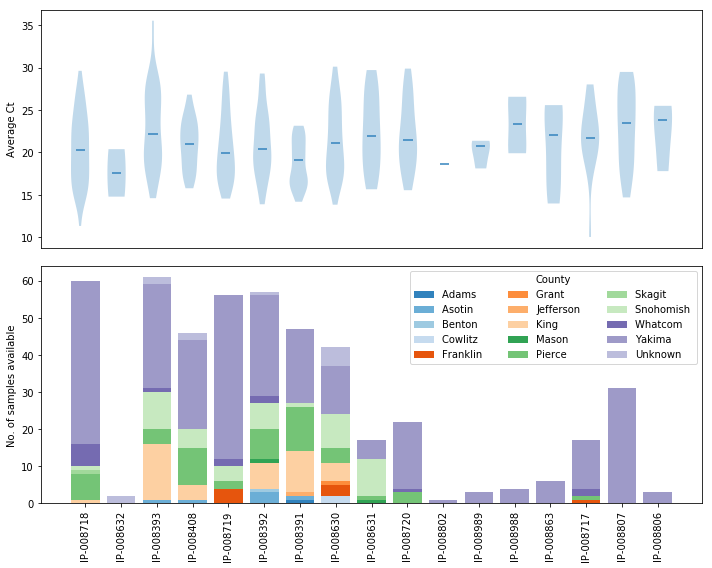

In [92]:
def plot_plates(df):
    df = df.dropna(subset=['avg_ct', 'plate_number'])
    df = df[df.primers=='n1/n2']
    df.loc[df.county.isna(), 'county'] = 'Unknown'
    
    plates = []
    plates = [plate for plate in set(df['plate_number'])]
    ct = [sorted(df.loc[df.plate_number == plate, 'avg_ct']) for plate in plates]
    size = [len(df[df.plate_number==plate]) for plate in plates]
    locations = sorted(set(df['county']))
    
    locations.append(locations.pop(locations.index('Unknown')))
    
    counties=[]
    for location in locations:
        county = [len(df[(df.county==location) & (df.plate_number==plate)]) for plate in plates]
        counties.append(county)
    pos = [i for i in range(len(plates))]

    fig, (ax1, ax3) = plt.subplots(2, figsize=(10,8))
    ax1.violinplot(ct,pos, showmedians=True, showextrema=False)
    #ax2.scatter(pos, size)

    counter=0
    for county, location in zip(counties, locations):
        county = np.asarray(county)
        if counter == 0:
            ax3.bar(plates, county, label=location)
            counter += 1
            bottom = county
        else:
            ax3.bar(plates, county, bottom=bottom, label=location)
            bottom += county
            
    
    ax1.set_ylabel('Average Ct')
    ax3.set_ylabel('No. of samples available')
    ax3.set_ylabel
    ax1.set_xticks([])
    #ax2.set_xticks([])
    ax3.set_xticks(pos)
    ax3.set_xticklabels(plates, rotation=90)
    ax3.legend(title='County', ncol=3)
    plt.tight_layout()
    return plt.show()
                    
plot_plates(metadata)
    

Based on the above, I'd consider resequencing the following:
- IP-008718
- IP-008719
- IP-008392
- IP-008630